In [21]:
import duckdb
import pandas as pd
from pathlib import Path

df = pd.read_json("jobsearch-2026-01-25-daily-public.json", lines=True)

#df.info()

In [22]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   abroad                        1 non-null      object
 1   country                       1 non-null      object
 2   country-label                 1 non-null      object
 3   driving-license-required      1 non-null      object
 4   employment-type               1 non-null      object
 5   experience                    1 non-null      object
 6   municipality                  1 non-null      object
 7   municipality-label            1 non-null      object
 8   occupation-collection         1 non-null      object
 9   occupation-collection-label   1 non-null      object
 10  occupation-field              1 non-null      object
 11  occupation-field-label        1 non-null      object
 12  occupation-group              1 non-null      object
 13  occupation-group-label        1 non

In [24]:
df.head().T

,0
abroad,"[[true, 12290]]"
country,"[[-i46j_HmG_v64, 1138], [i46j_HmG_v64, 186], [..."
country-label,"[[-Sverige, 1138], [Sverige, 186], [-Sverige (..."
driving-license-required,"[[false, 52100]]"
employment-type,"[[PFZr_Syz_cUq, 98867], [Jh8f_q9J_pbJ, 50941],..."
experience,"[[false, 5878]]"
municipality,"[[PVZL_BQT_XtL, 143862], [AvNB_uwa_6n6, 112787..."
municipality-label,"[[Göteborg, 143862], [Stockholm, 112787], [Mal..."
occupation-collection,"[[UdVa_jRr_9DE, 55575], [-UdVa_jRr_9DE, 16325]..."
occupation-collection-label,"[[Yrkessamling, yrken utan krav på utbildning,..."


In [14]:
df.shape

(1, 22)

In [28]:
df.columns

Index(['abroad', 'country', 'country-label', 'driving-license-required',
       'employment-type', 'experience', 'municipality', 'municipality-label',
       'occupation-collection', 'occupation-collection-label',
       'occupation-field', 'occupation-field-label', 'occupation-group',
       'occupation-group-label', 'open_for_all', 'q_approved', 'region',
       'region-label', 'remote', 'stats', 'unspecified-sweden-workplace',
       'worktime-extent'],
      dtype='str')

In [30]:
df.index

RangeIndex(start=0, stop=1, step=1)

In [33]:
df = df.T.squeeze()

In [34]:
type(df)

pandas.Series

In [35]:
municipality = pd.DataFrame(
    df["municipality-label"],
    columns=["municipality", "count"]
)

occupation_group = pd.DataFrame(
    df["occupation-group-label"],
    columns=["occupation_group", "count"]
)


In [40]:
municipality

,municipality,count
0,Göteborg,143862
1,Stockholm,112787
2,Malmö,85071
3,Lund,70984
4,Mölndal,67379
...,...,...
472,2061,2
473,2282,2
474,2283,2
475,1784,1


In [37]:
occupation_group

,occupation_group,count
0,Grundskollärare,42661
1,Övriga kontorsassistenter och sekreterare,35567
2,"Butikssäljare, dagligvaror",31419
3,Övriga handläggare,30913
4,Ekonomiassistenter m.fl.,30821
...,...,...
641,3117,1
642,3212,1
643,3412,1
644,5412,1


In [42]:
import matplotlib.pyplot as plt

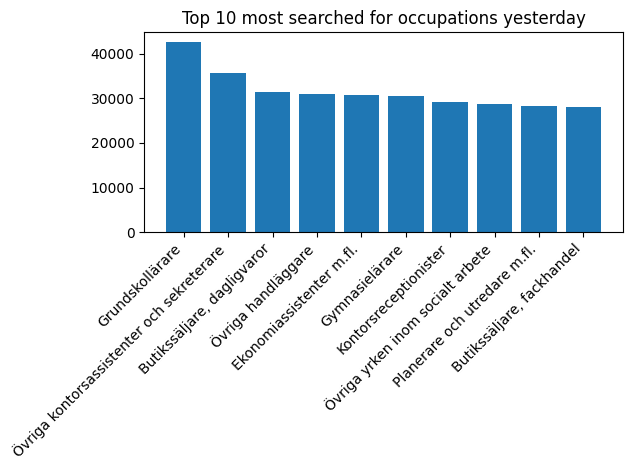

In [43]:
top10 = occupation_group.sort_values("count", ascending = False).head(10)

plt.figure()
plt.bar(top10["occupation_group"], top10["count"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 most searched for occupations yesterday")
plt.tight_layout()
plt.show()